In [11]:
import pandas as pd
import numpy as np
import pickle
data_raw = pd.read_csv("data_clean.csv")
q = data_raw["Price"].quantile(0.99)
data_raw = data_raw[data_raw["Price"] < q]
y = data_raw['Price']
X = data_raw[olx_raw.columns.difference(['Price'])]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10000)
cols_to_transform = ['Model','Fuel']
X_train = pd.get_dummies(columns=cols_to_transform, data=X_train, prefix_sep="_")
X_test = pd.get_dummies(columns=cols_to_transform, data=X_test, prefix_sep="_")
X_train, X_test = X_train.align(X_test,join='outer',axis=1)
from sklearn.linear_model import LinearRegression
linreg = LinearRegression() 
linreg.fit(X_train, y_train)
train_pred = linreg.predict(X_train)
test_pred = linreg.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
print("The R2 value on train dataset: {} \n".format(r2_score(y_pred=train_pred, y_true=y_train)))
print("The R2 value on test dataset: {} \n".format(r2_score(y_pred=test_pred, y_true=y_test)))
print("The Mean Squared Error on train dataset: {} \n".format(mean_squared_error(y_pred=train_pred,y_true=y_train)))
print("The Mean Squared Error on test dataset: {} \n".format(mean_squared_error(y_pred=test_pred,y_true=y_test)))
print(linreg.score(X_test,y_test))

The R2 value on train dataset: 0.8460945244470449 

The R2 value on test dataset: 0.8781774746617562 

The Mean Squared Error on train dataset: 11069179295.007586 

The Mean Squared Error on test dataset: 8679258466.393154 

0.8781774746617562


In [12]:
filename='model_lin_reg.sav'
pickle.dump(linreg,open(filename,'wb'))

In [4]:
dummy_csv=X_train.columns
import csv

In [5]:
with open('dummy_cvs.csv','w')as file:
    writer=csv.writer(file)
    writer.writerow(dummy_csv)

In [13]:
data = pd.read_csv("data_clean.csv")

In [31]:
models=list(data['Model'])
pricing=list(data['Price'])

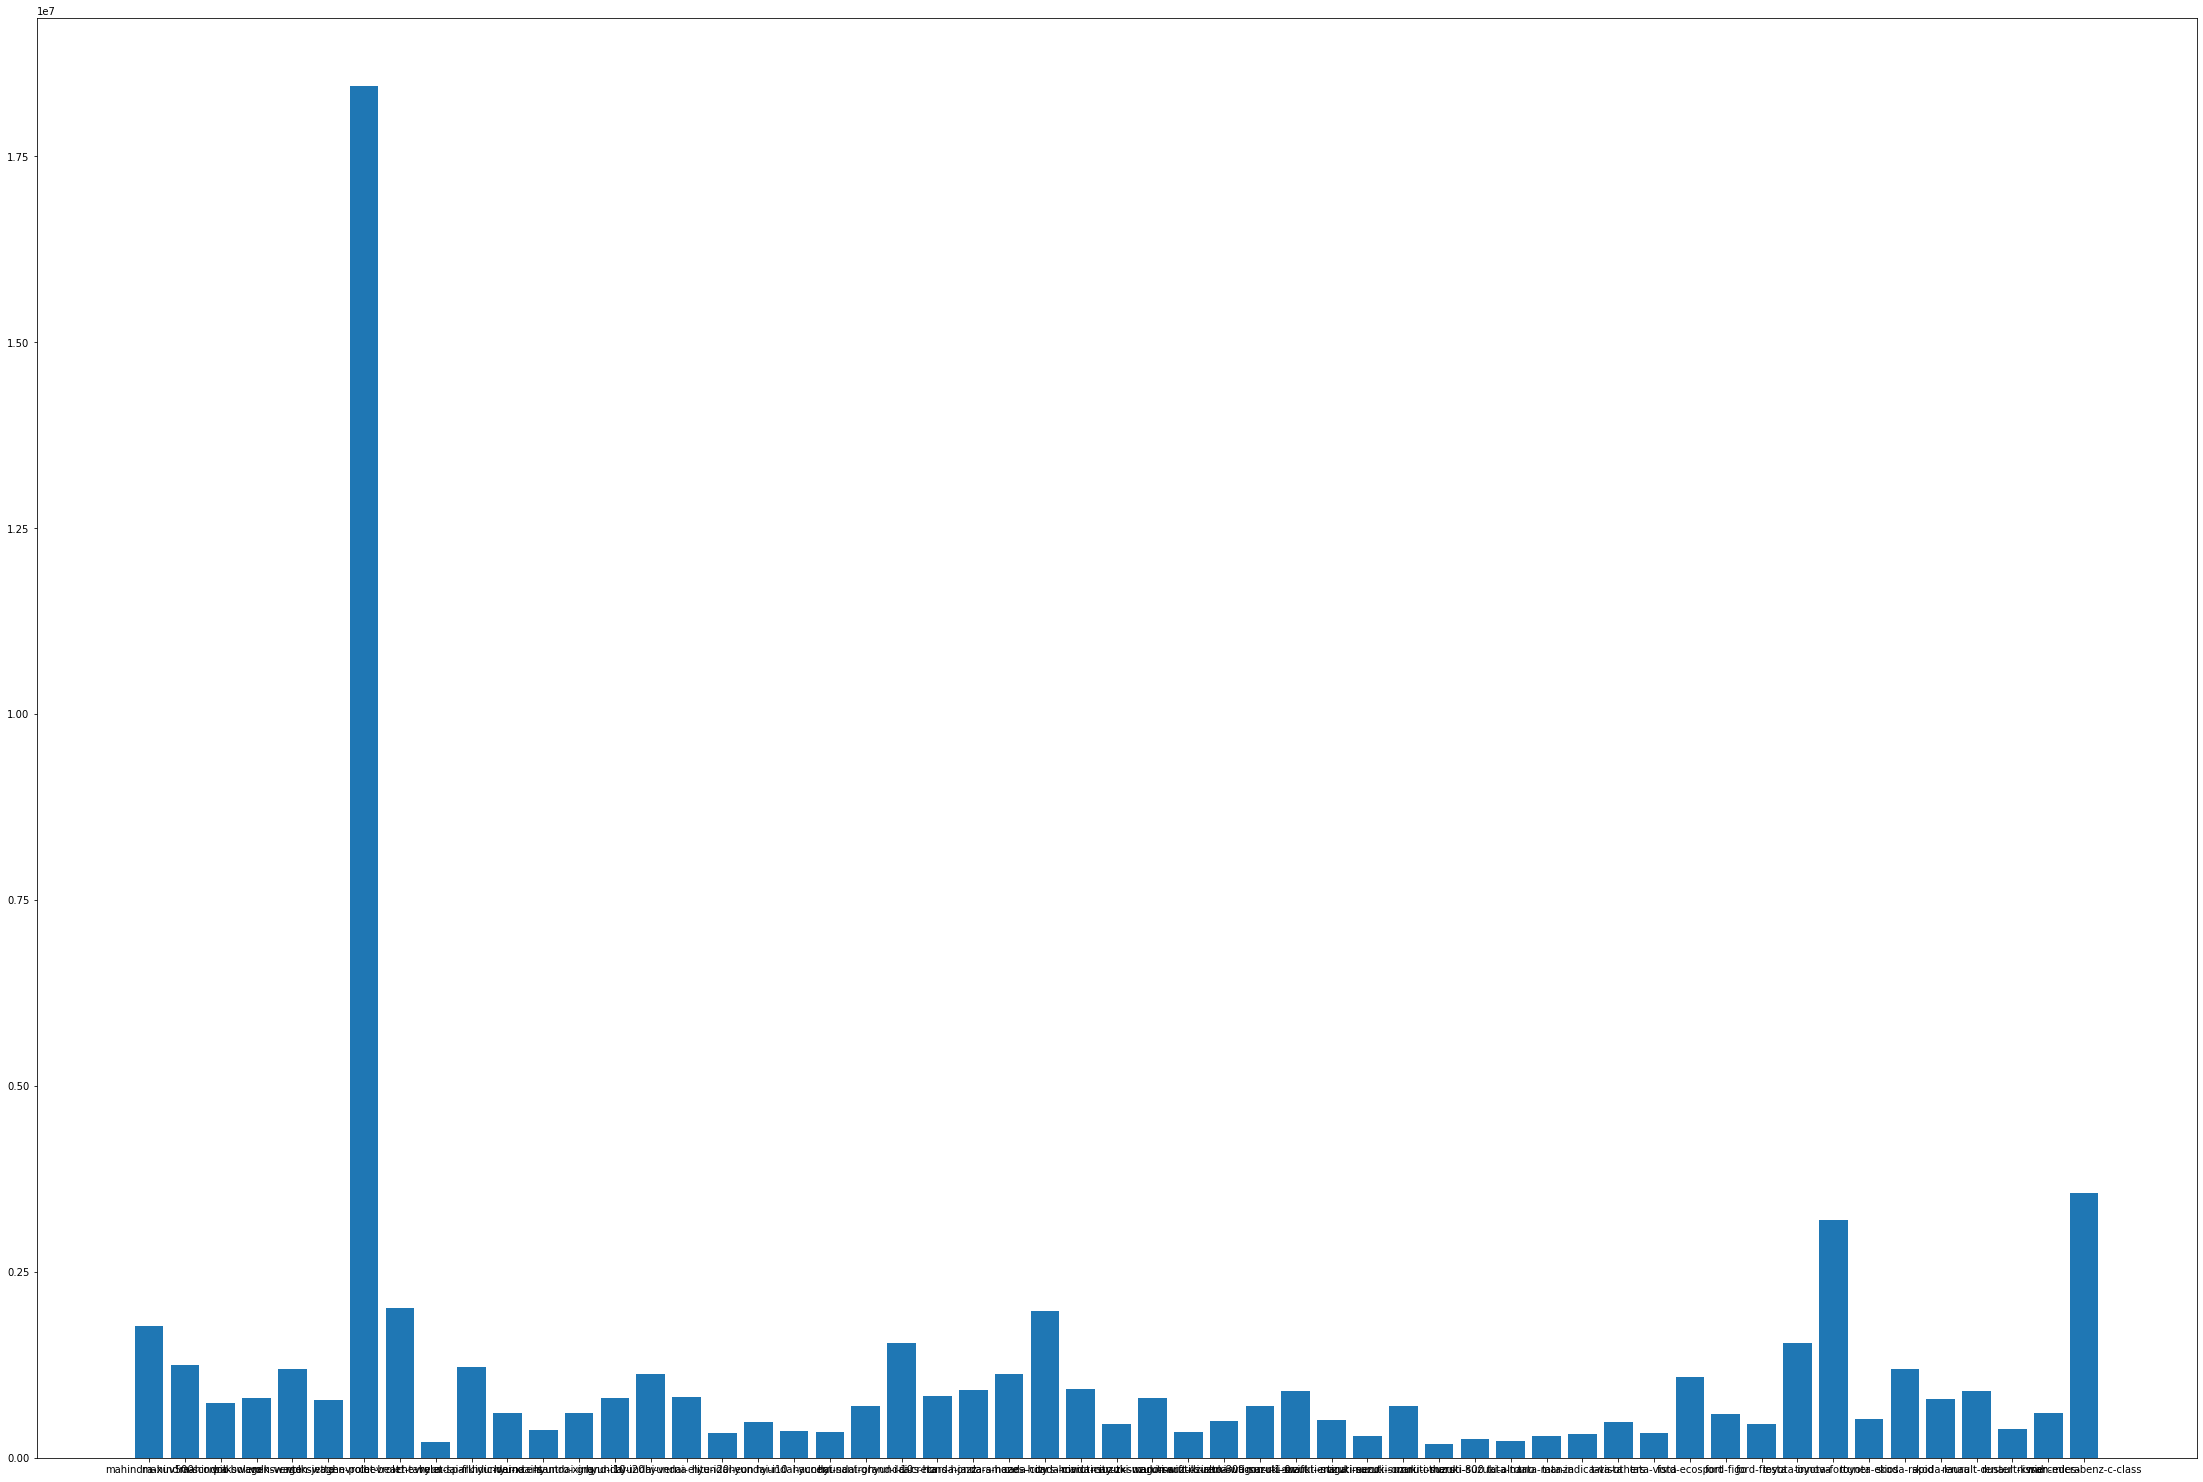

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,5,5])
ax.bar(models,pricing)
plt.show()